In [6]:
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [7]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [8]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [9]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [10]:
print(train)


                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [11]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [12]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [13]:
from tqdm.notebook import tqdm

In [14]:
import cv2 as cv2
def extract_features(images):
    features = []
    for image in tqdm(images):
        # Load image (assuming path-like string)
        img = cv2.imread(image)
        # Check if image is loaded successfully
        if img is None:
            print(f"Error loading image: {image}")
            continue
        # Convert to grayscale (assuming BGR format)
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        # Convert to NumPy array
        img_array = np.array(gray_img)
        # Reshape to desired format (48x48x1)
        img_array = img_array.reshape(48, 48, 1)  # Assuming target size is 48x48
        features.append(img_array)
    # Convert features list to NumPy array
    features = np.array(features)
    return features
# Assuming 'train' is a Pandas DataFrame with an 'image' column containing paths
train_features = extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [15]:
test_features = extract_features(test['image'])


  0%|          | 0/7066 [00:00<?, ?it/s]

In [16]:
x_train = train_features/255.0
x_test = test_features/255.0

In [15]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [17]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [18]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [19]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

D:\Visual studio\Python\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [20]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 


Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 370s 2s/step - accuracy: 0.2375 - loss: 1.8338 - val_accuracy: 0.2583 - val_loss: 1.8105
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.2524 - loss: 1.8079 - val_accuracy: 0.2611 - val_loss: 1.7781
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.2602 - loss: 1.7761 - val_accuracy: 0.2828 - val_loss: 1.7481
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 332s 1s/step - accuracy: 0.3132 - loss: 1.6994 - val_accuracy: 0.3990 - val_loss: 1.5347
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.3788 - loss: 1.5858 - val_accuracy: 0.4386 - val_loss: 1.4741
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.4125 - loss: 1.5047 - val_accuracy: 0.4800 - val_loss: 1.3649
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.4381 - loss: 1.4416 - val_accuracy: 0.5078 - val_loss: 1.3086
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 334s 1s/step - accuracy: 0.4616 - loss: 1.3925 - 

In [22]:
from keras.models import model_from_json

In [23]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.keras")

In [24]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.keras")

In [25]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']


In [26]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [27]:
def preprocess_image(image_path, target_size=(48, 48)):
    try:
        img = cv2.imread(image_path)  # Load image using OpenCV
    except Exception as e:
        raise ValueError(f"Error loading image: {image_path} ({e})") from e
    if img is None:
        raise ValueError(f"Image not found at: {image_path}")
   # Resize and convert to grayscale (combined)
    img = cv2.cvtColor(cv2.resize(img, target_size), cv2.COLOR_BGR2GRAY)

    # Reshape to match the expected input shape of your model (batch size included)
    img = img.reshape(1, *target_size, 1)  # Efficient reshaping with unpacking

    # Normalize pixel values (optional, adjust based on your model's preprocessing)
    # Example: Normalize to range [0, 1]
    img = img.astype('float32') / 255.0

    return img

if __name__ == "__main__":
    image_path = 'images/train/sad/42.jpg'
    print("Original image is labeled as sad")  # Assuming labels are provided

    try:
        preprocessed_img = preprocess_image(image_path)
        pred = model.predict(preprocessed_img)
        pred_label = label[np.argmax(pred)]
        print("Model prediction:", pred_label)
    except ValueError as e:
        print(f"Error: {e}")


Original image is labeled as sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
Model prediction: sad


In [28]:
!pip install matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Model prediction: sad


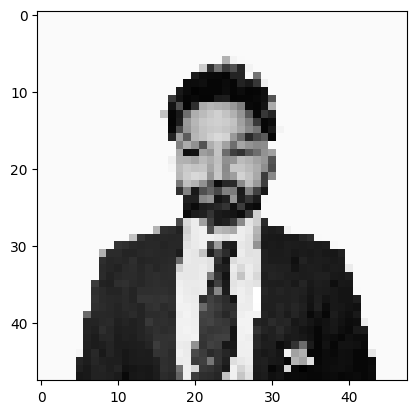

In [30]:
def preprocess_image(image_path, target_size=(48, 48)):
    try:
        img = cv2.imread(image_path)  # Load image using OpenCV
    except Exception as e:
        raise ValueError(f"Error loading image: {image_path} ({e})") from e
    if img is None:
        raise ValueError(f"Image not found at: {image_path}")
   # Resize and convert to grayscale (combined)
    img = cv2.cvtColor(cv2.resize(img, target_size), cv2.COLOR_BGR2GRAY)
    img = img.reshape(1, *target_size, 1)  # Efficient reshaping with unpacking
    img = img.astype('float32') / 255.0
    return img
if __name__ == "__main__":
    image_path = 'D:\LPU Study material\(4) Fourth Year\Sem 8\Capstone\Face Emotion Detection\RJ.jpg'
    try:
        preprocessed_img = preprocess_image(image_path)
        pred = model.predict(preprocessed_img)
        pred_label = label[np.argmax(pred)]
        print("Model prediction:", pred_label)
    except ValueError as e:
        print(f"Error: {e}")
plt.imshow(preprocessed_img.reshape(48,48),cmap='gray')